In [5]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [6]:
movies = pd.read_csv(r'D:\Python\Project\IMDb.csv')

1. Top 15 Countries by Box Office

In [7]:
df_clean = movies.dropna(subset=['Box Office', 'Country'])

df_clean['Country'] = df_clean['Country'].str.split(';')

df_exploded = df_clean.explode('Country')

df_exploded['Country'] = df_exploded['Country'].str.strip()

df_exploded['Box Office'] = pd.to_numeric(df_exploded['Box Office'], errors='coerce')

box_office_by_country = df_exploded.groupby('Country')['Box Office'].mean().sort_values(ascending=False)

print(box_office_by_country)


Country
Norway                  2.052415e+09
New Zealand             9.203525e+08
Gambia                  7.148444e+08
Hungary                 7.148444e+08
United Arab Emirates    7.148444e+08
Jordan                  5.945081e+08
Australia               4.822571e+08
Morocco                 4.655162e+08
Malta                   4.655162e+08
Mexico                  4.492524e+08
Canada                  4.102304e+08
China                   3.217527e+08
Hong Kong               2.914814e+08
United States           2.830362e+08
United Kingdom          2.416999e+08
Japan                   1.931533e+08
Spain                   1.587035e+08
India                   1.324065e+08
Germany                 1.243218e+08
Poland                  1.200989e+08
Italy                   1.152904e+08
France                  9.724579e+07
South Korea             7.982719e+07
Lebanon                 6.441700e+07
Qatar                   6.441700e+07
Cyprus                  6.441700e+07
Ireland                 5.0599

C:\Users\User\AppData\Local\Temp\ipykernel_14152\240898364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Country'] = df_clean['Country'].str.split(';')


In [8]:
top_countries_by_BO = box_office_by_country.head(15)

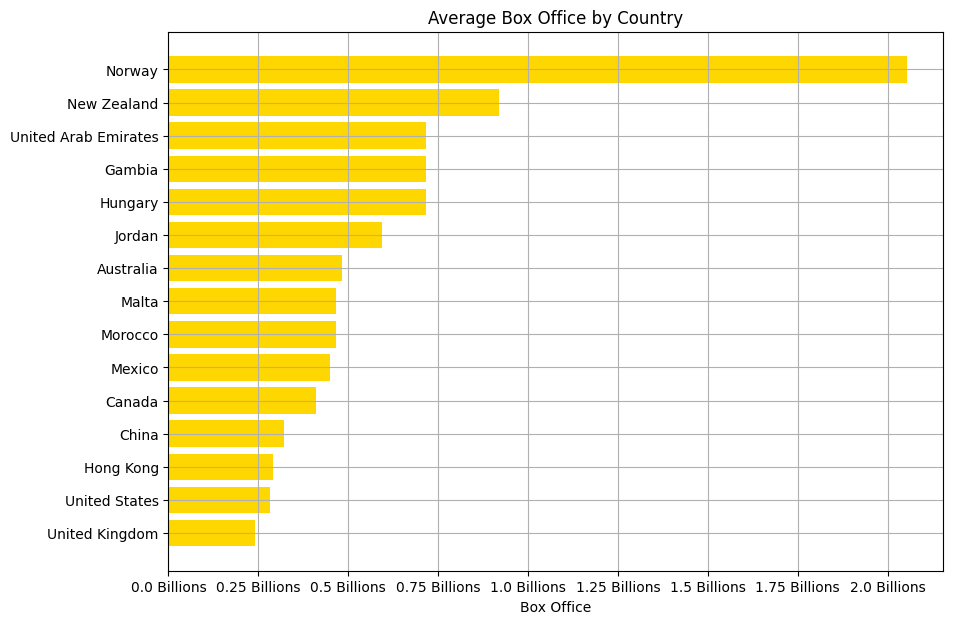

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator

def billions(x, pos):
    return f'{float(x/1e9)} Billions'


box_office_sorted = top_countries_by_BO.sort_values()

plt.figure(figsize=(10, 7))
plt.barh(box_office_sorted.index, box_office_sorted.values, color='gold')

plt.xlabel('Box Office')
plt.title('Average Box Office by Country')

formatter = FuncFormatter(billions)
plt.gca().xaxis.set_major_formatter(formatter)
plt.grid()
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))


# plt.tight_layout()
plt.show()

This KPI shows how much on average a movie makes from box office for each country.

---

2. Average IMDb rating per Country

In [10]:
# Drop rows with missing Box Office or Country values
df_clean = movies.dropna(subset=['IMDb Rating', 'Country'])

# Split the 'Country' column into lists where there are multiple countries
df_clean['Country'] = df_clean['Country'].str.split(';')

# Explode the 'Country' column so each row has only one country
df_exploded = df_clean.explode('Country')

# Strip whitespace from country names
df_exploded['Country'] = df_exploded['Country'].str.strip()

# Ensure 'IMDb Rating' is numeric
df_exploded['IMDb Rating'] = pd.to_numeric(df_exploded['IMDb Rating'], errors='coerce')

# Group by country and sum the IMDb Rating
rating_by_country = df_exploded.groupby('Country')['IMDb Rating'].mean().sort_values(ascending=False).round(2)

# Display the result
print(rating_by_country)


Country
New Zealand             8.80
Brazil                  8.60
Poland                  8.50
Morocco                 8.50
Hungary                 8.50
Gambia                  8.50
Hong Kong               8.50
United Arab Emirates    8.50
Malta                   8.50
West Germany            8.47
Turkey                  8.45
Norway                  8.40
Lebanon                 8.40
Cyprus                  8.40
Qatar                   8.40
Jordan                  8.35
Italy                   8.34
India                   8.34
Germany                 8.33
United States           8.32
Mexico                  8.30
Denmark                 8.30
Belgium                 8.30
Soviet Union            8.30
France                  8.30
Japan                   8.30
Canada                  8.29
Australia               8.28
Spain                   8.26
United Kingdom          8.26
Iran                    8.25
South Korea             8.25
China                   8.20
Sweden                  8.17
Austri

In [11]:
ratings = rating_by_country.groupby('Country').mean().sort_values(ascending=False)
rating_by_country

Country
New Zealand             8.80
Brazil                  8.60
Poland                  8.50
Morocco                 8.50
Hungary                 8.50
Gambia                  8.50
Hong Kong               8.50
United Arab Emirates    8.50
Malta                   8.50
West Germany            8.47
Turkey                  8.45
Norway                  8.40
Lebanon                 8.40
Cyprus                  8.40
Qatar                   8.40
Jordan                  8.35
Italy                   8.34
India                   8.34
Germany                 8.33
United States           8.32
Mexico                  8.30
Denmark                 8.30
Belgium                 8.30
Soviet Union            8.30
France                  8.30
Japan                   8.30
Canada                  8.29
Australia               8.28
Spain                   8.26
United Kingdom          8.26
Iran                    8.25
South Korea             8.25
China                   8.20
Sweden                  8.17
Austri

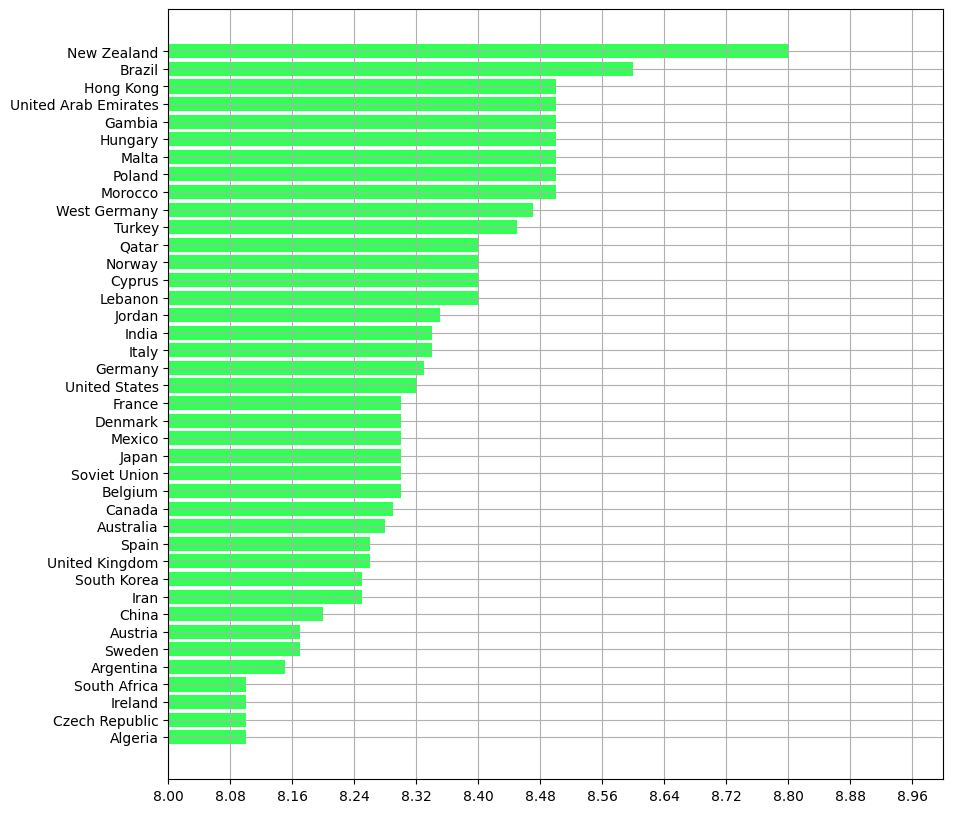

In [12]:
ratings_sorted = ratings.sort_values()
plt.figure(figsize=(10,10))
plt.barh(ratings_sorted.index, ratings_sorted.values, color='#33ff57')
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=15))
plt.xlim(8.0, 9.0)
plt.grid()


plt.show()

This KPI shows average movie rating for each country, which will help determine whose movies people like the most

---

3. Top 15 most popular Actors

In [13]:
counter = Counter()
for actors in movies['Top Cast']:
    for actor in actors.split(';'):
        counter[actor] += 1

popular_actors = pd.DataFrame.from_dict(data=counter, orient='index').reset_index()
popular_actors.columns = ['Actor Name', 'Movie Count']

top_actors = popular_actors.sort_values(by='Movie Count',ascending=False).head(15)
top_actors

Actor Name  Movie Count
15      Robert De Niro            9
62       Harrison Ford            6
56   Leonardo DiCaprio            6
45           Tom Hanks            6
51           Brad Pitt            5
219    Charles Chaplin            5
103         Matt Damon            5
40      Clint Eastwood            5
10      Christian Bale            5
88       James Stewart            4
174    Tatsuya Nakadai            4
6            Al Pacino            4
98      Toshirô Mifune            4
26       Orlando Bloom            4
425      Steve Buscemi            4

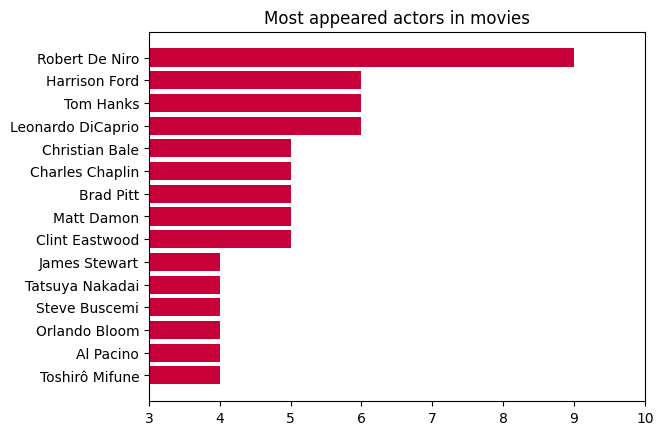

In [14]:
top_actors_sorted = top_actors.sort_values(by='Movie Count')
plt.barh(top_actors_sorted['Actor Name'], top_actors_sorted['Movie Count'], color="#C70039")
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=4))
ticks = [3, 4, 5, 6, 7, 8, 9, 10]
plt.xlim(3, 10)
plt.xticks(ticks)

plt.title('Most appeared actors in movies')

plt.show()

The KPI show the most popular actors in one or more of the 250 movies. Watching movies with these actors will likely be appealing to people.

---

4. Number of Movies produced per each Country

In [15]:
country_counter = Counter()
for countries in movies['Country']:
    for country in countries.split(';'):
        country_counter[country] += 1
num_of_movies_per_country = country_counter
country_movies = pd.DataFrame.from_dict(data=num_of_movies_per_country, orient='index')
country_movies.columns = ['Number of Movies']

In [16]:
top_country_movies = country_movies.head(15)

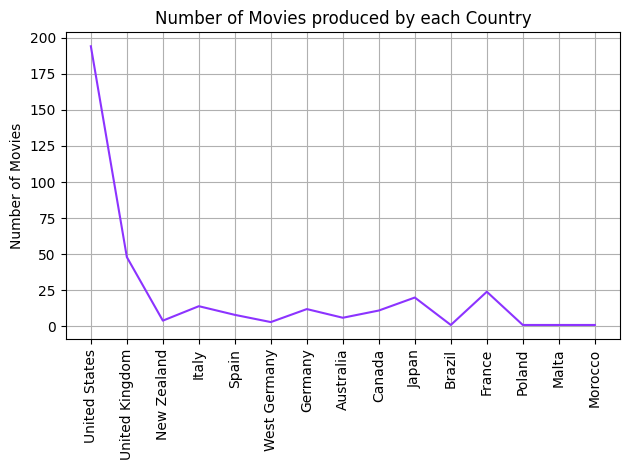

In [17]:
plt.plot(top_country_movies.index, top_country_movies.values, color='#8c33ff')
plt.xticks(rotation=90)
# plt.figure(figsize=(12, 6))
plt.grid()
plt.title('Number of Movies produced by each Country')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

This linechart illustrates The distribution of movies in the dataset by Countries.
This is a valuable insight that reflects which countries make the best movies(becuse these movies are top 250 movies ranked by IMDb), which tells the FilmFlix movies produced in which countries will attract most audience and popularity. For example, in the chart above, it is best to stream American movies as those are most liked by people

---

5. Top directors by average movie rating

In [18]:
directors_rating = movies[['Director(s)', 'IMDb Rating']].dropna()
directors_rating['Director(s)'] = directors_rating['Director(s)'].str.split(';')
directors_exploded = directors_rating.explode('Director(s)')

In [19]:
top_directors_by_movie_rating = directors_exploded.groupby('Director(s)').mean().sort_values(by='IMDb Rating', ascending=False).round(2).head(20)

In [20]:
plt.bar(top_directors_by_movie_rating.index, top_directors_by_movie_rating['IMDb Rating'], color='#ff6c6c')
plt.xticks(rotation=90)
plt.ylim(8.4, 9)

plt.show()

The KPI above shows whose films are liked the most, which can help choose movies that are likely hit if streamed.

----

6. Top genres

In [21]:
counter = Counter()

for genres in movies['Genre(s)']:
    for genre in genres.split(';'):
        counter[genre] += 1
counter

Counter({'Drama': 188,
         'Psychological Drama': 60,
         'Adventure': 59,
         'Epic': 58,
         'Tragedy': 54,
         'Crime': 54,
         'Period Drama': 53,
         'Thriller': 51,
         'Action': 45,
         'Comedy': 45,
         'Mystery': 35,
         'War': 32,
         'Dark Comedy': 30,
         'Biography': 28,
         'Family': 27,
         'Romance': 26,
         'Fantasy': 25,
         'Sci-Fi': 24,
         'Animation': 24,
         'Adventure Epic': 23,
         'Docudrama': 23,
         'Quest': 22,
         'Action Epic': 21,
         'Psychological Thriller': 21,
         'Coming-of-Age': 20,
         'Satire': 18,
         'Gangster': 17,
         'Suspense Mystery': 16,
         'War Epic': 15,
         'Supernatural Fantasy': 14,
         'Computer Animation': 14,
         'Dystopian Sci-Fi': 13,
         'Superhero': 12,
         'Legal Drama': 12,
         'Space Sci-Fi': 12,
         'Hand-Drawn Animation': 11,
         'Buddy Comedy'

In [22]:
top_genres = pd.Series(counter).sort_values(ascending=False).head(15)

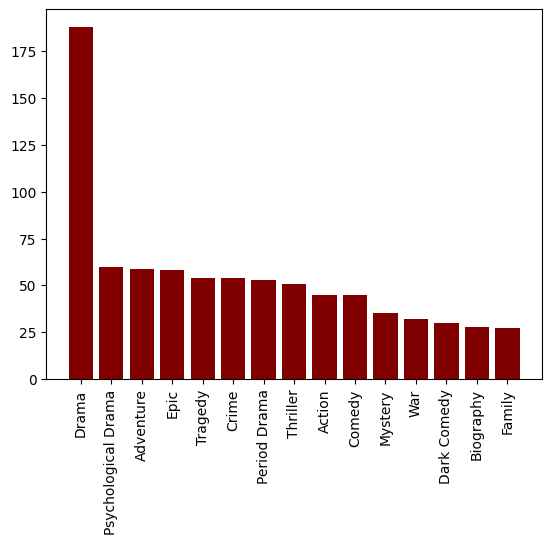

In [23]:
plt.bar(top_genres.index, top_genres.values, color='maroon')
plt.xticks(rotation=90)
plt.show()

This KPI shows the most popular genres. This basically tells us movies whith which genre are more likely to be watched and/or liked. In this case, it can be seen that 188 movies out of 250 are Drama movies, which is a lot more than that of other genres. This means that people prefer Drama most than other genres(at least among the top 250 movies).

----------------